# Salary Estimation using KNN

In [139]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('salary.csv')

In [17]:
df.shape

(32561, 5)

In [6]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [8]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [18]:
income=set(df['income'])

In [22]:
df['income'] = df['income'].map({'<=50K':0 ,'>50K':1}).astype(int)

In [24]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [27]:
X=df.iloc[:,:-1]

In [31]:
Y=df.iloc[:,-1]

In [32]:
X

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [33]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

# Now split the data

In [41]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
X_train

,age,education.num,capital.gain,hours.per.week
5514,26,9,0,25
19777,24,9,0,35
10781,36,13,0,40
32240,22,10,0,20
9876,31,13,0,40
...,...,...,...,...
29802,25,9,0,40
5390,51,11,0,40
860,55,9,0,40
15795,41,10,0,50


# Now perform feature scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
ss=StandardScaler()

In [66]:
X_train=ss.fit_transform(X_train)

In [67]:
X_test = ss.transform(X_test)

In [68]:
X_test

array([[-0.70116088, -0.03423025, -0.14716638, -0.04208134],
       [-1.43714007, -0.03423025, -0.14716638, -2.06925767],
       [-0.7747588 , -0.03423025, -0.14716638, -0.04208134],
       ...,
       [ 1.28598292,  1.51575588, -0.14716638, -0.04208134],
       [-1.21634631,  0.35326628, -0.14716638, -1.6638224 ],
       [ 0.47640581, -2.35920945, -0.14716638,  1.98509498]])

In [69]:
X_train

array([[-0.92195464, -0.42172678, -0.14716638, -1.25838714],
       [-1.06915047, -0.42172678, -0.14716638, -0.44751661],
       [-0.18597545,  1.12825935, -0.14716638, -0.04208134],
       ...,
       [ 1.212385  , -0.42172678, -0.14716638, -0.04208134],
       [ 0.18201414, -0.03423025, -0.14716638,  0.76878919],
       [-1.21634631, -0.42172678, -0.14716638,  0.76878919]])

In [78]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# For finding the best value of k

Text(0, 0.5, 'Mean Error')

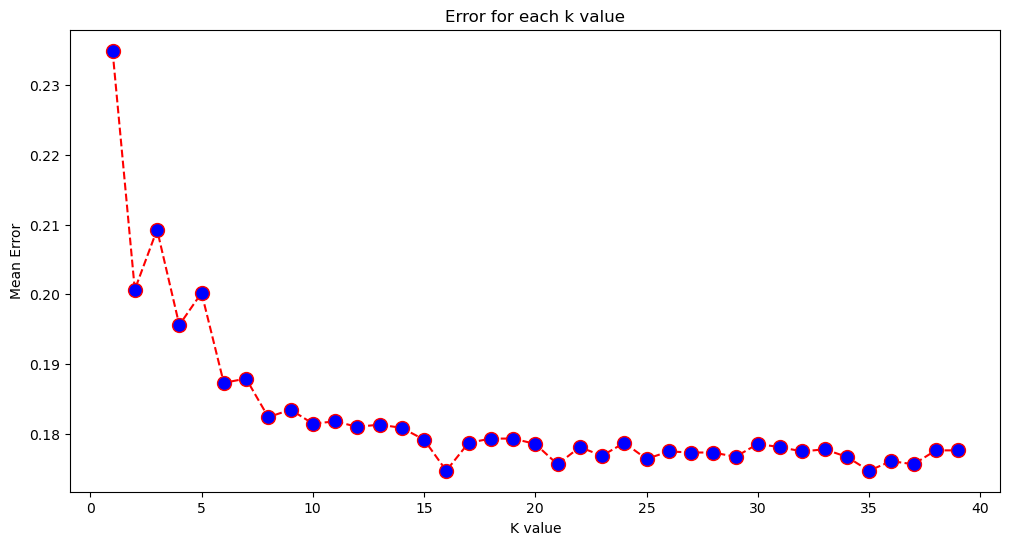

In [131]:
error =[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=Y_test))
plt.figure(figsize=(12,6)) 
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error for each k value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
    

In [126]:
knn=KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)

In [132]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=39)

In [133]:
Y_predict=knn.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [135]:
print(accuracy_score(Y_test,Y_predict)*100)

82.23552894211576


# Confusion Matrix

In [136]:
cm=confusion_matrix

In [137]:
cm(Y_test,Y_predict)

array([[4726,  250],
       [ 907,  630]], dtype=int64)